## Section 3 – Unsupervised learning – clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from wordcloud import WordCloud

In [2]:
df = pd.read_parquet("df_tfidf.parquet")

X = df.drop(columns=["Set_Fingerprint"])
X

,enable,system,sh,cat,proc,mounts,bin,busybox,cd,dev,...,top,sleep,tar,passwd,nc,mkdir,unix,mv,nohup,tsm
0,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.0,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000
1,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.0,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000
2,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.0,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000
3,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.0,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000
4,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.0,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233030,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.0,0.000000,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821
233031,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.0,0.000000,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821
233032,0.128896,0.065000,0.000000,0.000000,0.00000,0.238360,0.000000,0.0,0.000000,0.238736,...,0.0,0.000000,0.321332,0.064319,0.0,0.193360,0.0,0.450819,0.000000,0.06446
233033,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.0,0.000000,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821


## 3.1 Determine the number of clusters

### 3.1.1 K-means

In [ ]:
# Within-Cluster Sum of Squares (WCSS): For each value of k (number of clusters),
# calculate the sum of squared distances (WCSS) between points and their respective cluster centroids.
wcss = []
silhouette_scores_kmeans = []
n_cluster_list_kmeans = []


# Compute WCSS for different values of k
for n_clusters in range(3, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit(X)

    wcss.append(kmeans.inertia_)  # WCSS is stored in the `inertia_` attribute
    silhouette_scores_kmeans.append(silhouette_score(X, kmeans.labels_))
    n_cluster_list_kmeans.append(n_clusters)



In [ ]:
print(silhouette_scores_kmeans)
print(wcss)

[0.8703829672905754, 0.8224829357426683, 0.8615692550436398, 0.8608293529867128, 0.8828293121290064, 0.8385105608743917, 0.8464366447916166]
[7312.15188837872, 6822.6998577374525, 5625.802754361189, 4592.26592316723, 4143.621417293221, 4379.474107246069, 3891.611909562335]


best k:  7 , corresponding silhouette:  0.8828293121290064


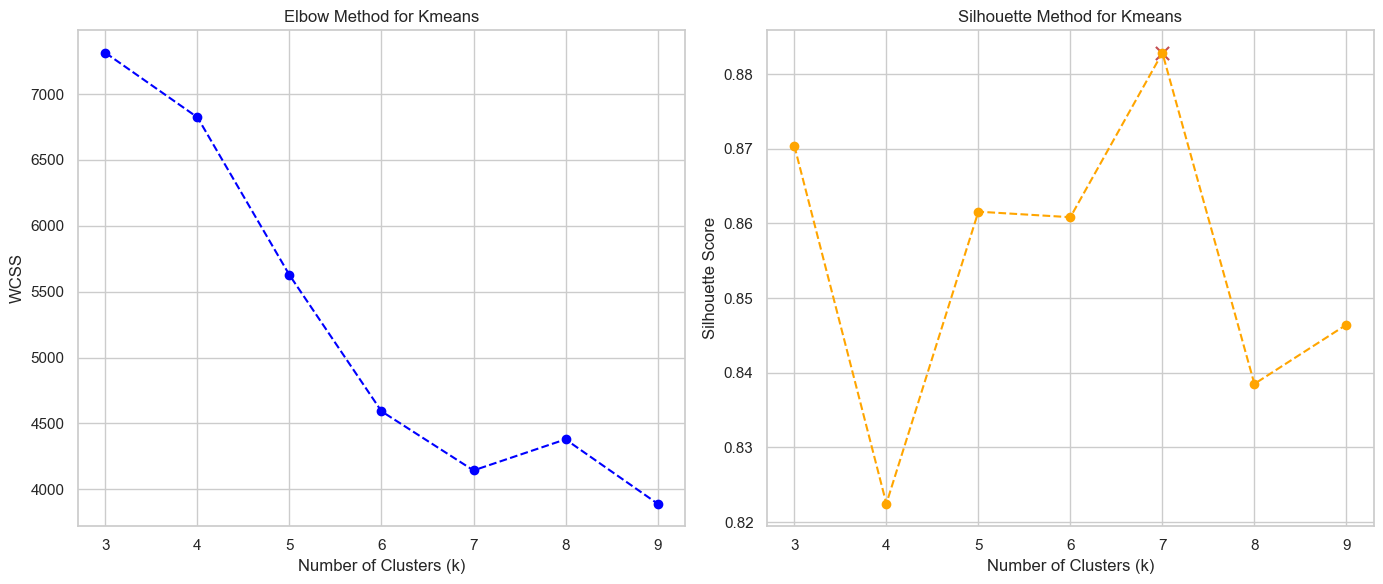

In [ ]:


best_silhouette_kmeans= np.max(silhouette_scores_kmeans) # Best silhouette
best_n_cluster_kmeans = n_cluster_list_kmeans[np.argmax(silhouette_scores_kmeans)] # Get n_clusters related to the best silhouette
print("best k: ",best_n_cluster_kmeans, ", corresponding silhouette: ", best_silhouette_kmeans)

plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
plt.subplot(1, 2, 1)
plt.plot(n_cluster_list_kmeans, wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Kmeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(3, 10))

# Plot the Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(n_cluster_list_kmeans, silhouette_scores_kmeans, marker='o', linestyle='--', color='orange')
plt.scatter(best_n_cluster_kmeans, best_silhouette_kmeans, color='r', marker='x', s=90)
plt.title('Silhouette Method for Kmeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(3, 10))

plt.tight_layout()
plt.show()

### 3.1.2 GMM

In [ ]:
n_cluster_list_gmm =[]
silhouette_list_gmm = []
log_l_list=[]

for n_clusters in range(3, 10):
    gmm = GaussianMixture(n_components=n_clusters)
    cl_labels = gmm.fit_predict(X)
    n_cluster_list_gmm.append(n_clusters)
    silhouette_list_gmm.append(silhouette_score(X, cl_labels))
    log_l_list.append(gmm.score(X))


[0.8696142777965538, 0.8309043900676977, 0.8362271466492444, 0.8341445867831077, 0.8522300684395958, 0.849302994294732, 0.8566096335863579, 0.8757444016842602, 0.8768376539949679]
[170.2844705722868, 210.29056195141465, 229.31356103982196, 230.3017603004579, 238.22294147863843, 243.05319321954784, 237.3008999266926, 242.34288449607106, 242.55638765186328]
best k:  11 , corresponding silhouette:  0.8768376539949679


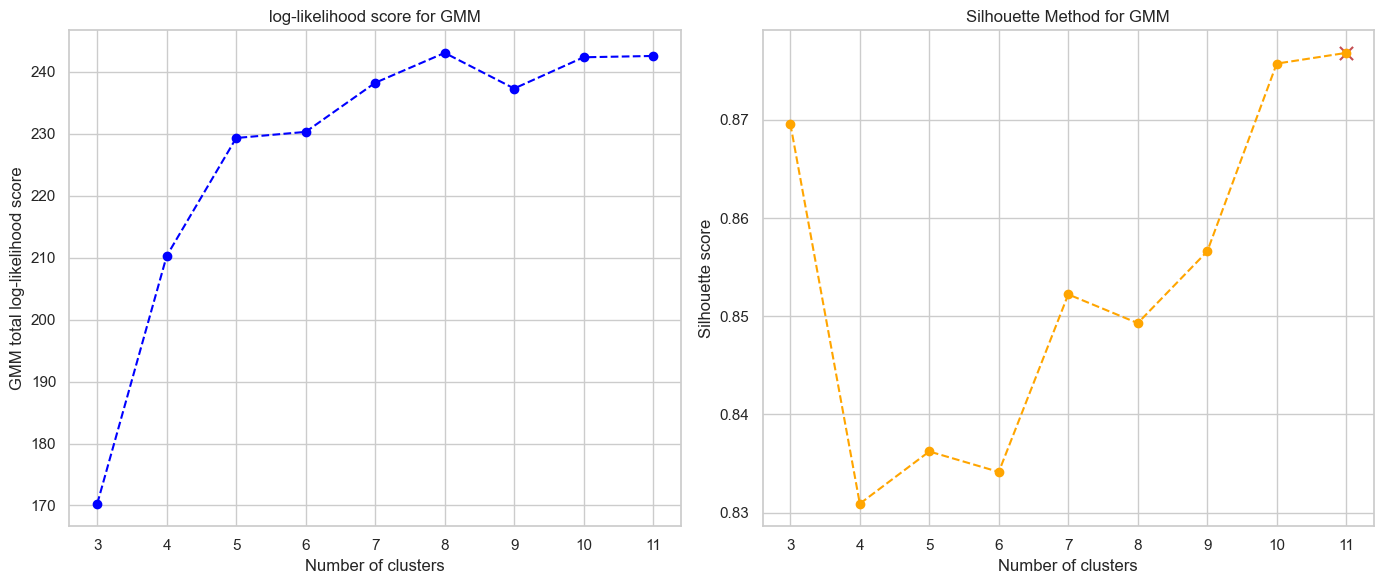

In [ ]:
print(silhouette_list_gmm)
print(log_l_list)
best_silhouette_gmm= np.max(silhouette_list_gmm) # Best silhouette
best_n_cluster_gmm = n_cluster_list_gmm[np.argmax(silhouette_list_gmm)] # Get n_clusters related to the best silhouette
print("best k: ",best_n_cluster_gmm, ", corresponding silhouette: ", best_silhouette_gmm)

# Plot
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
plt.subplot(1, 2, 1)
plt.plot(n_cluster_list_gmm, log_l_list, marker='o', linestyle='--', color='blue')
plt.title('log-likelihood score for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.xticks(range(3, 12))

plt.subplot(1, 2, 2)
plt.plot(n_cluster_list_gmm, silhouette_list_gmm, marker='o', linestyle='--', color='orange')
plt.scatter(best_n_cluster_gmm, best_silhouette_gmm, color='r', marker='x', s=90)
plt.title('Silhouette Method for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(range(3, 12))

plt.tight_layout()
plt.show()

## 3.2 Tuning other hyperparameters

### 3.2.1 K-means

In [ ]:
param_grid_kmeans = {
    'init': ['k-means++', 'random'],
    'n_init':  [1, 4, 10],
    'max_iter':  [50, 100, 150, 200, 250],
}

kmeans = KMeans(n_clusters=7, random_state=42)
grid_search_kmeans = GridSearchCV(kmeans, param_grid = param_grid_kmeans, cv=5)
grid_search_kmeans.fit(X)

best_params_kmeans = grid_search_kmeans.best_params_
print("Best parameters:", best_params_kmeans)


Best parameters: {'init': 'k-means++', 'max_iter': 200, 'n_init': 4}


In [19]:
kmeans_t = KMeans(n_clusters = 7, init = best_params_kmeans['init'], n_init = best_params_kmeans['n_init'], max_iter = best_params_kmeans['max_iter'], random_state=42)
kmeans_label_t = kmeans_t.fit_predict(X)

silhouette_kmeans_tuned = silhouette_score(X, kmeans_t.labels_)
wcss = (kmeans_t.inertia_)
print("Silhouette: ", silhouette_kmeans_tuned)
print("Inertia: ", wcss)

Silhouette:  0.8641304614723029
Inertia:  4105.714975857744


### 3.2.2 GMM

In [4]:
param_grid_gmm = {
    'covariance_type': ['full', 'spherical'],
    'tol': [1e-3, 1e-4],
    'max_iter': [50, 100, 150],
}

def silhouette_scoring(gmm, X):
    labels = gmm.fit_predict(X)
    return silhouette_score(X, labels)

# Create GaussianMixture object
gmm_to_tune = GaussianMixture(n_components=7,random_state=42)

grid_search_gmm = GridSearchCV(gmm_to_tune, param_grid_gmm, scoring = silhouette_scoring, cv = 3)
grid_search_gmm.fit(X)

best_params_gmm = grid_search_gmm.best_params_
print("Best parameters:", best_params_gmm)

Best parameters: {'covariance_type': 'full', 'max_iter': 50, 'tol': 0.001}


In [5]:
gmm_t = GaussianMixture(n_components = 11, random_state=42, covariance_type=best_params_gmm['covariance_type'], max_iter=best_params_gmm['max_iter'], tol=best_params_gmm['tol'])
gmm_label_t = gmm_t.fit_predict(X)
silhouette_gmm_tuned = silhouette_score(X, gmm_label_t)
log_l_t = (gmm_t.score(X))
print("Silhouette: ", silhouette_gmm_tuned)
print("Log-l: ", log_l_t)

Silhouette:  0.8767174753847375
Log-l:  244.545469947533


## 3.3 t-SNE visualization

In [6]:
features = pd.DataFrame(X)
tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(features.values)
tsne_results__df = pd.DataFrame(tsne)
tsne_results__df

,0,1
0,-175.467804,-66.091690
1,-175.467804,-66.091690
2,-175.467804,-66.091690
3,-175.467804,-66.091690
4,-175.467804,-66.091690
...,...,...
233030,43.658092,57.662804
233031,43.658092,57.662804
233032,-27.763721,50.380970
233033,43.658092,57.662804


### 3.3.1 K-means

In [20]:
# K-means
df_tsne_kmeans = pd.DataFrame(tsne_results__df)
df_tsne_kmeans["cluster"] = kmeans_label_t
df_tsne_kmeans.columns = ["x1", "x2", "cluster"]
df_tsne_kmeans

,x1,x2,cluster
0,-175.467804,-66.091690,3
1,-175.467804,-66.091690,3
2,-175.467804,-66.091690,3
3,-175.467804,-66.091690,3
4,-175.467804,-66.091690,3
...,...,...,...
233030,43.658092,57.662804,2
233031,43.658092,57.662804,2
233032,-27.763721,50.380970,5
233033,43.658092,57.662804,2


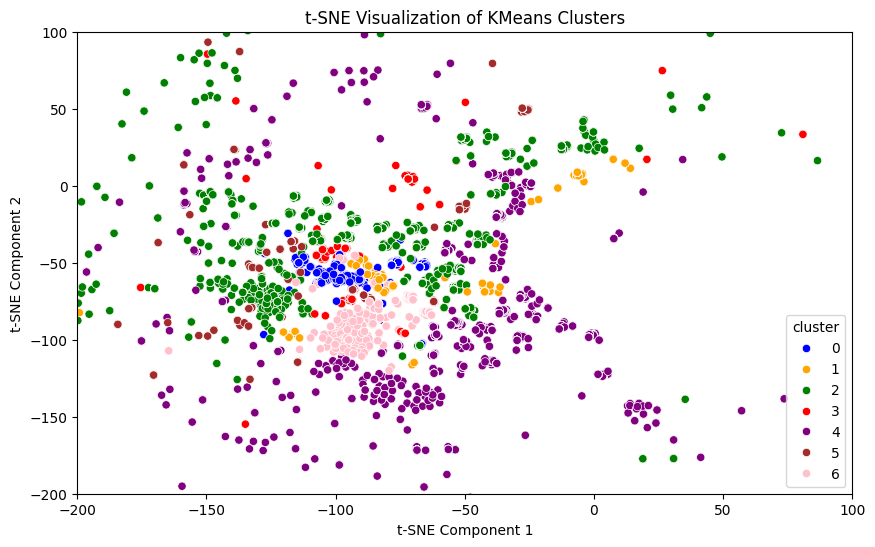

In [21]:
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne_kmeans, x='x1', y='x2', hue='cluster', legend="full", palette=colors)
plt.title('t-SNE Visualization of KMeans Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.xlim(-200, 100)
plt.ylim(-200, 100)
plt.show()


### 3.3.2 GMM

In [7]:
# GMM
df_gmm_tsne = pd.DataFrame(tsne_results__df)
df_gmm_tsne["cluster"] = gmm_label_t
df_gmm_tsne.columns = ["x1", "x2", "cluster"]
df_gmm_tsne

,x1,x2,cluster
0,-175.467804,-66.091690,2
1,-175.467804,-66.091690,2
2,-175.467804,-66.091690,2
3,-175.467804,-66.091690,2
4,-175.467804,-66.091690,2
...,...,...,...
233030,43.658092,57.662804,0
233031,43.658092,57.662804,0
233032,-27.763721,50.380970,9
233033,43.658092,57.662804,0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


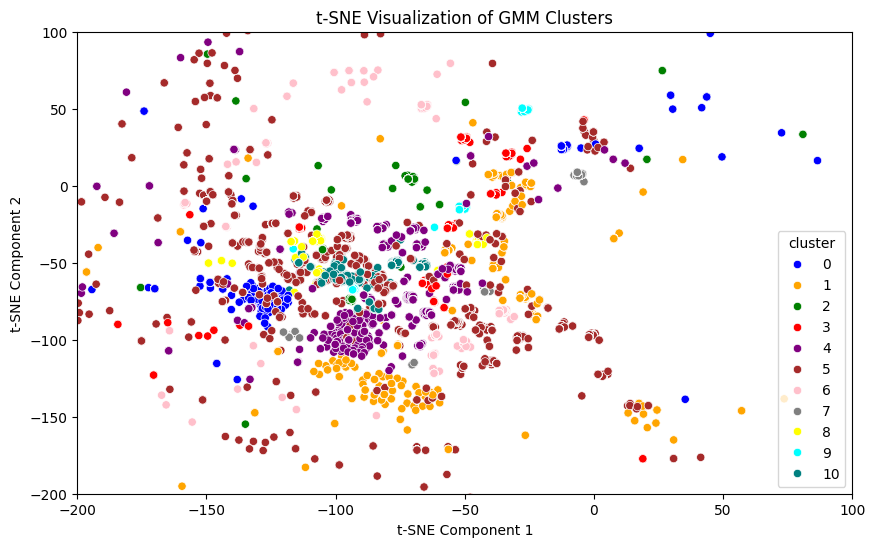

In [10]:
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "yellow", "cyan", "teal"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gmm_tsne, x='x1', y='x2', hue='cluster', legend="full", palette=colors)
plt.title('t-SNE Visualization of GMM Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.xlim(-200, 100)  # Zoom in on x-axis
plt.ylim(-200, 100)  # Zoom in on y-axis
plt.show()

## 3.4 Cluster analysis

### 3.4.1 GMM wordclouds

In [11]:
df_cluster = pd.DataFrame(X)
df_cluster["cluster_labels_gmm"] = gmm_label_t
df_cluster

,enable,system,sh,cat,proc,mounts,bin,busybox,cd,dev,...,sleep,tar,passwd,nc,mkdir,unix,mv,nohup,tsm,cluster_labels_gmm
0,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2
1,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2
2,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2
3,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2
4,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.131995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233030,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.000000,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0
233031,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.000000,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0
233032,0.128896,0.065000,0.000000,0.000000,0.00000,0.238360,0.000000,0.0,0.000000,0.238736,...,0.000000,0.321332,0.064319,0.0,0.193360,0.0,0.450819,0.000000,0.06446,9
233033,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.000000,0.340026,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0


In [12]:
# Group by cluster
cluster_groups = df_cluster.groupby('cluster_labels_gmm').mean()  # Average TF-IDF per cluster

# Select top 10 words for each cluster
top_words_by_cluster = {}

for cluster in cluster_groups.index:
    cluster_tfidf = cluster_groups.loc[cluster]
    top_words = cluster_tfidf.sort_values(ascending=False).head(10)
    top_words_by_cluster[cluster] = top_words
    print(f"Cluster {cluster} - Top 10 Words:")
    print(top_words)
    print()

Cluster 0 - Top 10 Words:
mv        0.477512
rm        0.408222
tar       0.339960
dev       0.252871
mounts    0.252472
wget      0.248869
tmp       0.205198
mkdir     0.204808
uname     0.204503
bash      0.201493
Name: 0, dtype: float64

Cluster 1 - Top 10 Words:
tar       0.503686
unix      0.426708
mv        0.356733
bin       0.239723
top       0.213564
free      0.213250
ss        0.210377
rm        0.178046
head      0.165539
mounts    0.165037
Name: 1, dtype: float64

Cluster 2 - Top 10 Words:
sh       0.657239
proc     0.526164
print    0.364018
root     0.131835
cd       0.131716
dd       0.131711
sleep    0.131458
nohup    0.130344
echo     0.129136
cat      0.120551
Name: 2, dtype: float64

Cluster 3 - Top 10 Words:
mv        0.437403
rm        0.373933
tar       0.312795
ss        0.244037
dev       0.231631
mounts    0.231266
wget      0.231067
bash      0.190632
mkdir     0.187605
tmp       0.187342
Name: 3, dtype: float64

Cluster 4 - Top 10 Words:
mv        0.331562
r

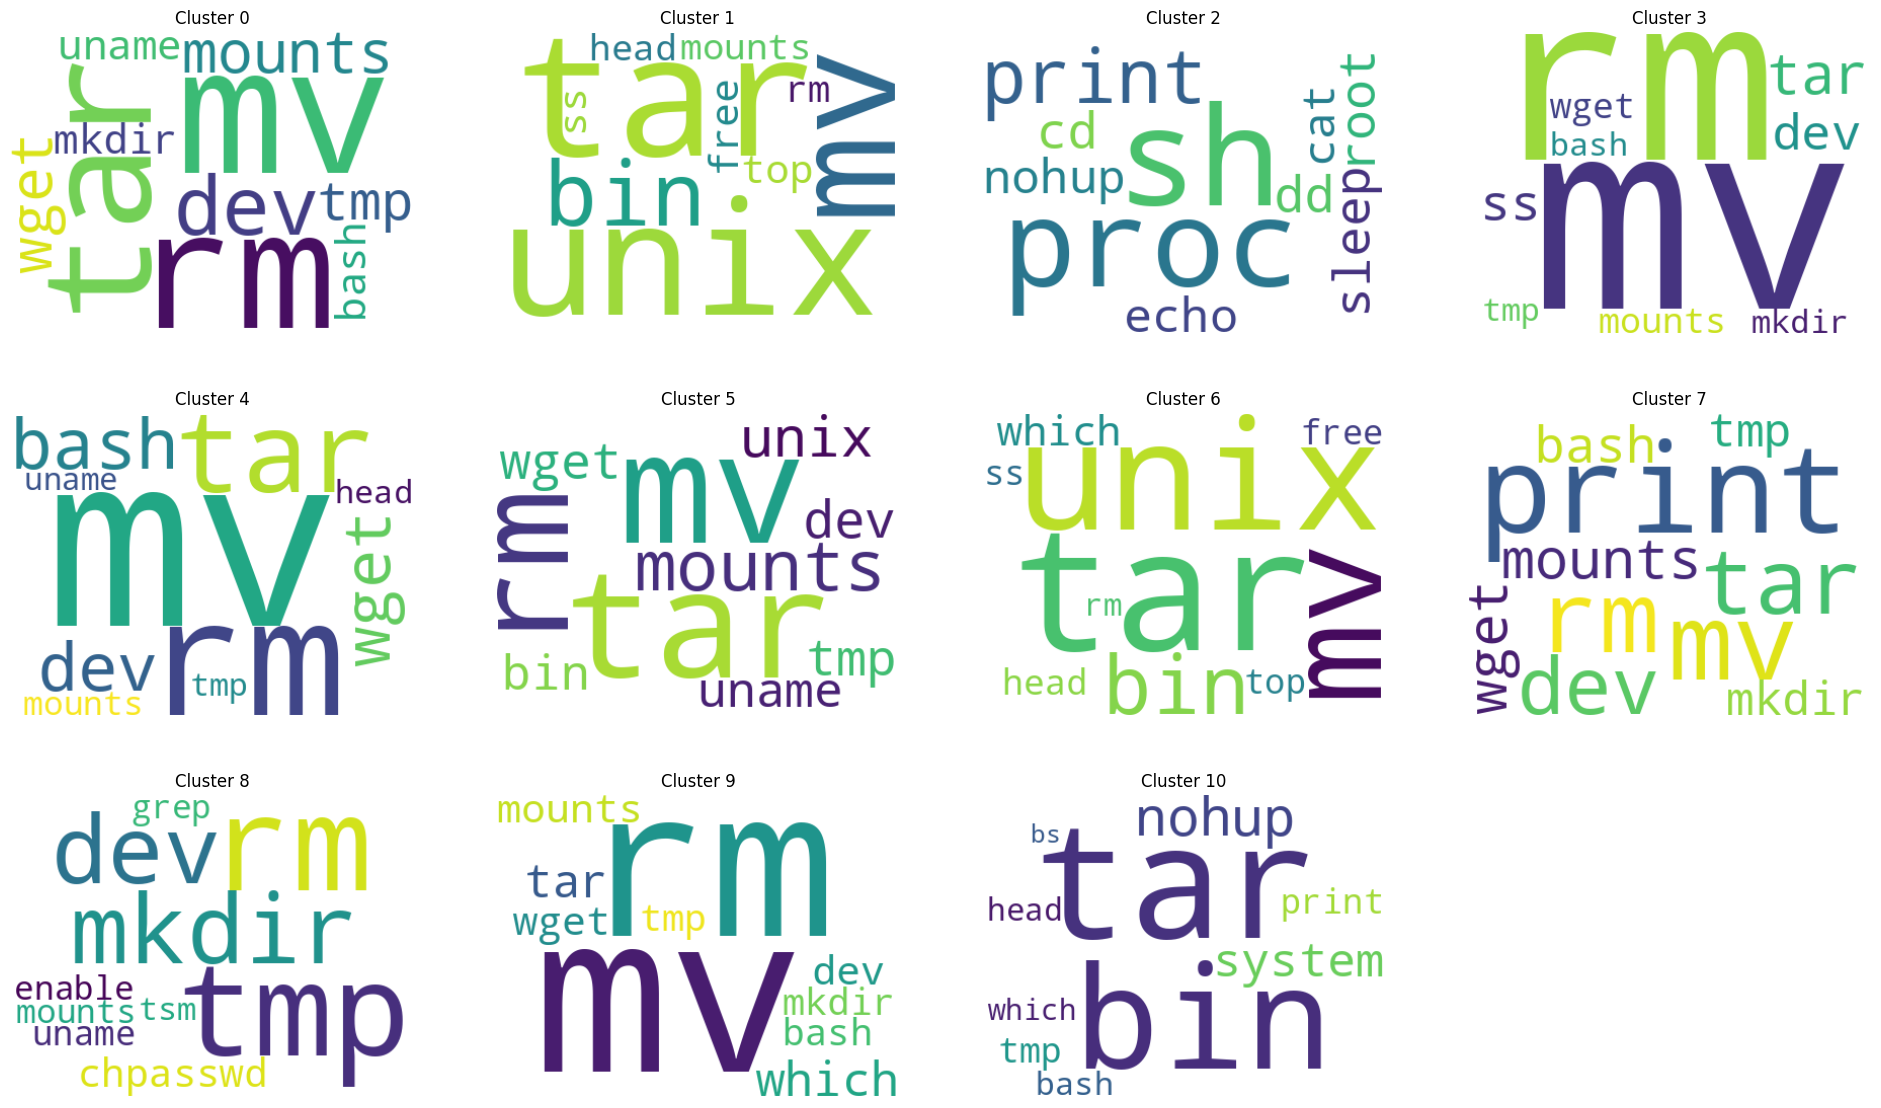

In [13]:
plt.figure(figsize=(20, 12))

for i, (cluster, top_words) in enumerate(top_words_by_cluster.items()):
    plt.subplot(3, 4, i + 1)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(top_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')

plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Horizontal and vertical spacing

plt.tight_layout(pad=4)
plt.show()

### 3.4.2 K-means wordcloud

In [22]:
df_cluster["cluster_labels_kmeans"] = kmeans_label_t

In [23]:
# Group by cluster
cluster_groups_kmeans = df_cluster.groupby('cluster_labels_kmeans').mean()

# Select top 10 words for each cluster
top_words_by_cluster_kmeans = {}

for cluster in cluster_groups_kmeans.index:
    cluster_tfidf = cluster_groups.loc[cluster]
    top_words = cluster_tfidf.sort_values(ascending=False).head(10)
    top_words_by_cluster_kmeans[cluster] = top_words
    print(f"Cluster {cluster} - Top 10 Words:")
    print(top_words)
    print()

Cluster 0 - Top 10 Words:
mv        0.477512
rm        0.408222
tar       0.339960
dev       0.252871
mounts    0.252472
wget      0.248869
tmp       0.205198
mkdir     0.204808
uname     0.204503
bash      0.201493
Name: 0, dtype: float64

Cluster 1 - Top 10 Words:
tar       0.503686
unix      0.426708
mv        0.356733
bin       0.239723
top       0.213564
free      0.213250
ss        0.210377
rm        0.178046
head      0.165539
mounts    0.165037
Name: 1, dtype: float64

Cluster 2 - Top 10 Words:
sh       0.657239
proc     0.526164
print    0.364018
root     0.131835
cd       0.131716
dd       0.131711
sleep    0.131458
nohup    0.130344
echo     0.129136
cat      0.120551
Name: 2, dtype: float64

Cluster 3 - Top 10 Words:
mv        0.437403
rm        0.373933
tar       0.312795
ss        0.244037
dev       0.231631
mounts    0.231266
wget      0.231067
bash      0.190632
mkdir     0.187605
tmp       0.187342
Name: 3, dtype: float64

Cluster 4 - Top 10 Words:
mv        0.331562
r

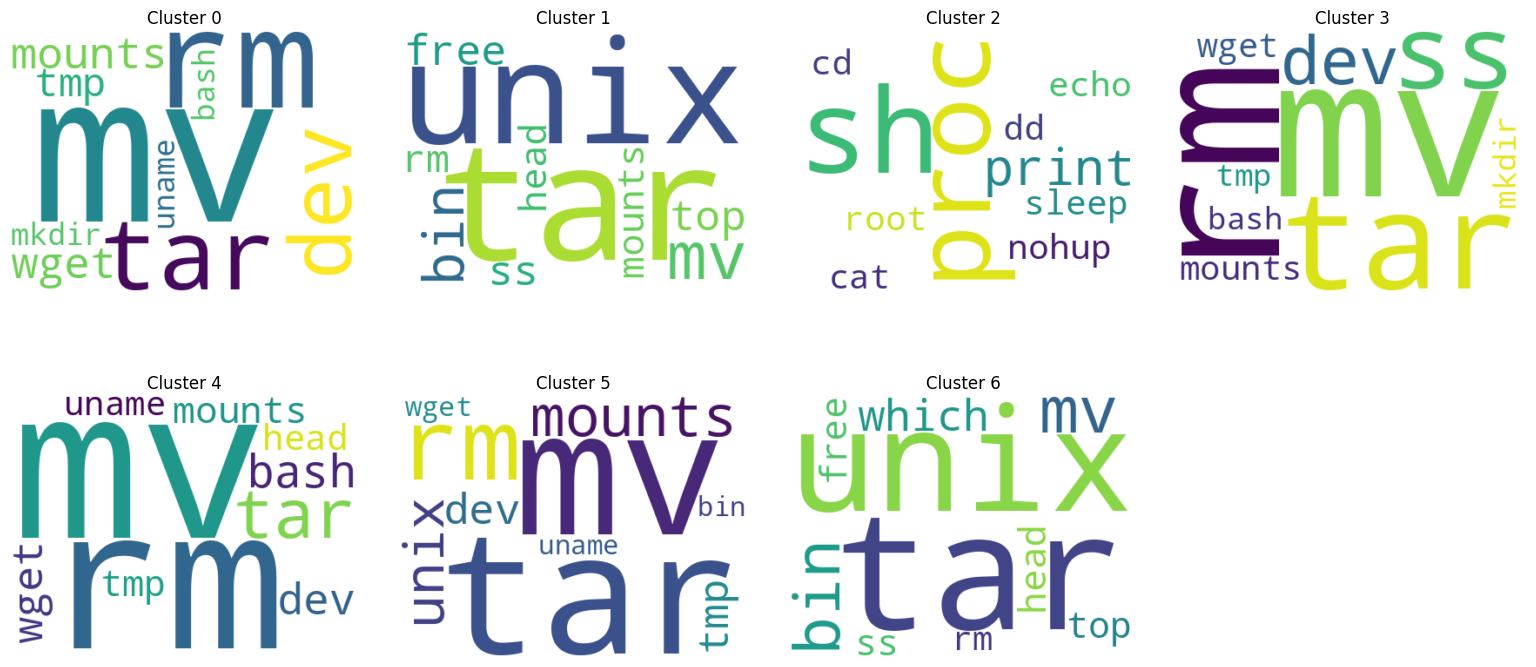

In [24]:
plt.figure(figsize=(16, 8))

for i, (cluster, top_words) in enumerate(top_words_by_cluster_kmeans.items()):
    plt.subplot(2, 4, i + 1)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(top_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')

plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Horizontal and vertical spacing

plt.tight_layout(pad=3)
plt.show()

## 3.5 Do clusters reflect intent division

In [26]:
df_cluster_intents = pd.DataFrame(df_cluster)
df_cluster_intents['Set_Fingerprint'] = df['Set_Fingerprint']
df_cluster_intents

,enable,system,sh,cat,proc,mounts,bin,busybox,cd,dev,...,passwd,nc,mkdir,unix,mv,nohup,tsm,cluster_labels_gmm,cluster_labels_kmeans,Set_Fingerprint
0,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,"[Defense Evasion, Discovery]"
1,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,"[Defense Evasion, Discovery]"
2,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,"[Defense Evasion, Discovery]"
3,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,"[Defense Evasion, Discovery]"
4,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,0.037247,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,"[Defense Evasion, Discovery]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233030,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0,2,"[Discovery, Persistence]"
233031,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0,2,"[Discovery, Persistence]"
233032,0.128896,0.065000,0.000000,0.000000,0.00000,0.238360,0.000000,0.0,0.000000,0.238736,...,0.064319,0.0,0.193360,0.0,0.450819,0.000000,0.06446,9,5,"[Discovery, Persistence]"
233033,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,0.252625,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0,2,"[Discovery, Persistence]"


In [27]:
df_cluster_exp = df_cluster_intents.explode("Set_Fingerprint").reset_index()

df_cluster_exp

,index,enable,system,sh,cat,proc,mounts,bin,busybox,cd,...,passwd,nc,mkdir,unix,mv,nohup,tsm,cluster_labels_gmm,cluster_labels_kmeans,Set_Fingerprint
0,0,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,Defense Evasion
1,0,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,Discovery
2,1,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,Defense Evasion
3,1,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,Discovery
4,2,0.000000,0.000000,0.656004,0.121018,0.52813,0.111565,0.064612,0.0,0.132227,...,0.000000,0.0,0.000000,0.0,0.000000,0.130346,0.00000,2,3,Defense Evasion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557921,233032,0.128896,0.065000,0.000000,0.000000,0.00000,0.238360,0.000000,0.0,0.000000,...,0.064319,0.0,0.193360,0.0,0.450819,0.000000,0.06446,9,5,Persistence
557922,233033,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0,2,Discovery
557923,233033,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0,2,Persistence
557924,233034,0.136394,0.068782,0.000000,0.000000,0.00000,0.252226,0.000000,0.0,0.000000,...,0.068061,0.0,0.204608,0.0,0.477045,0.000000,0.06821,0,2,Discovery


### 3.5.1 Intents in GMM clusters

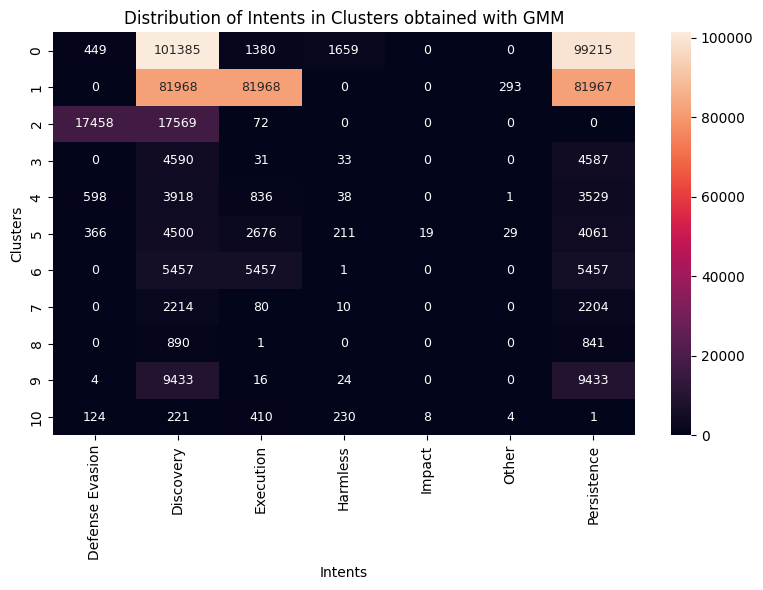

Set_Fingerprint,Defense Evasion,Discovery,Execution,Harmless,Impact,Other,Persistence
Cluster,,,,,,,
0,449,101385,1380,1659,0,0,99215
1,0,81968,81968,0,0,293,81967
2,17458,17569,72,0,0,0,0
3,0,4590,31,33,0,0,4587
4,598,3918,836,38,0,1,3529
5,366,4500,2676,211,19,29,4061
6,0,5457,5457,1,0,0,5457
7,0,2214,80,10,0,0,2204
8,0,890,1,0,0,0,841


In [17]:
cluster_df_gmm_intents = pd.DataFrame({'Set_Fingerprint': df_cluster_exp["Set_Fingerprint"], 'Cluster': df_cluster_exp["cluster_labels_gmm"]})
cluster_distribution_gmm = cluster_df_gmm_intents.groupby('Cluster')['Set_Fingerprint'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(cluster_distribution_gmm, annot=True, fmt='d', annot_kws={"size": 9})
plt.title('Distribution of Intents in Clusters obtained with GMM')
plt.xlabel('Intents')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()
cluster_distribution_gmm

### 3.5.2 Intents in K-means clusters

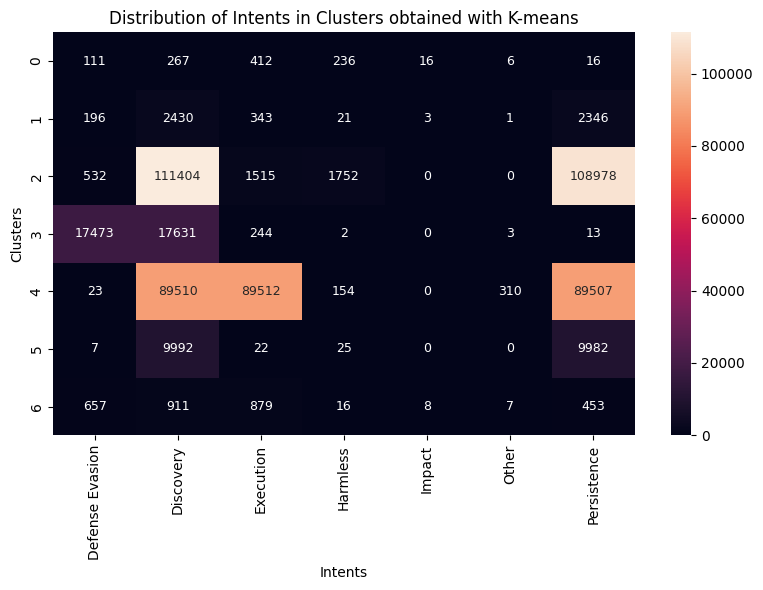

Set_Fingerprint,Defense Evasion,Discovery,Execution,Harmless,Impact,Other,Persistence
Cluster,,,,,,,
0,111,267,412,236,16,6,16
1,196,2430,343,21,3,1,2346
2,532,111404,1515,1752,0,0,108978
3,17473,17631,244,2,0,3,13
4,23,89510,89512,154,0,310,89507
5,7,9992,22,25,0,0,9982
6,657,911,879,16,8,7,453


In [28]:
cluster_df_kmeans_intents = pd.DataFrame({'Set_Fingerprint': df_cluster_exp["Set_Fingerprint"], 'Cluster': df_cluster_exp["cluster_labels_kmeans"]})
cluster_distribution_kmeans = cluster_df_kmeans_intents.groupby('Cluster')['Set_Fingerprint'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(cluster_distribution_kmeans, annot=True, fmt='d', annot_kws={"size": 9})
plt.title('Distribution of Intents in Clusters obtained with K-means')
plt.xlabel('Intents')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()
cluster_distribution_kmeans